Predicting the rain from predictor columns:
    - Date
    - Location
    - MinTemp
    - MaxTemp
    - Rainfall
    - Evaporation
    - Sunshine
    - WindGustDir
    - WindGustSpeed
    - WindDir9am
    - WindDir3pm
    - WindSpeed9am
    - WindSpeed3pm
    - Humidity9am
    - Humidity3pm
    - Pressure9am
    - Pressure3pm
    - Cloud9am
    - Cloud3pm
    - Temp9am
    - Temp3pm
    - RainToday

In [77]:
# Import libraries and dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

df = pd.read_csv('data/weatherAUS.csv')

In [78]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


From the above glimpse of the data, we can see that there are some null values mainly distributed at some predictor columns. We will identify and analyze the technical meaning of the columns.  

In [79]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [81]:
row = df.shape[0]
column = df.shape[1]
print(f"Total number of instances: {row} \nTotal number of features: {column}") 

Total number of instances: 145460 
Total number of features: 23


<AxesSubplot:>

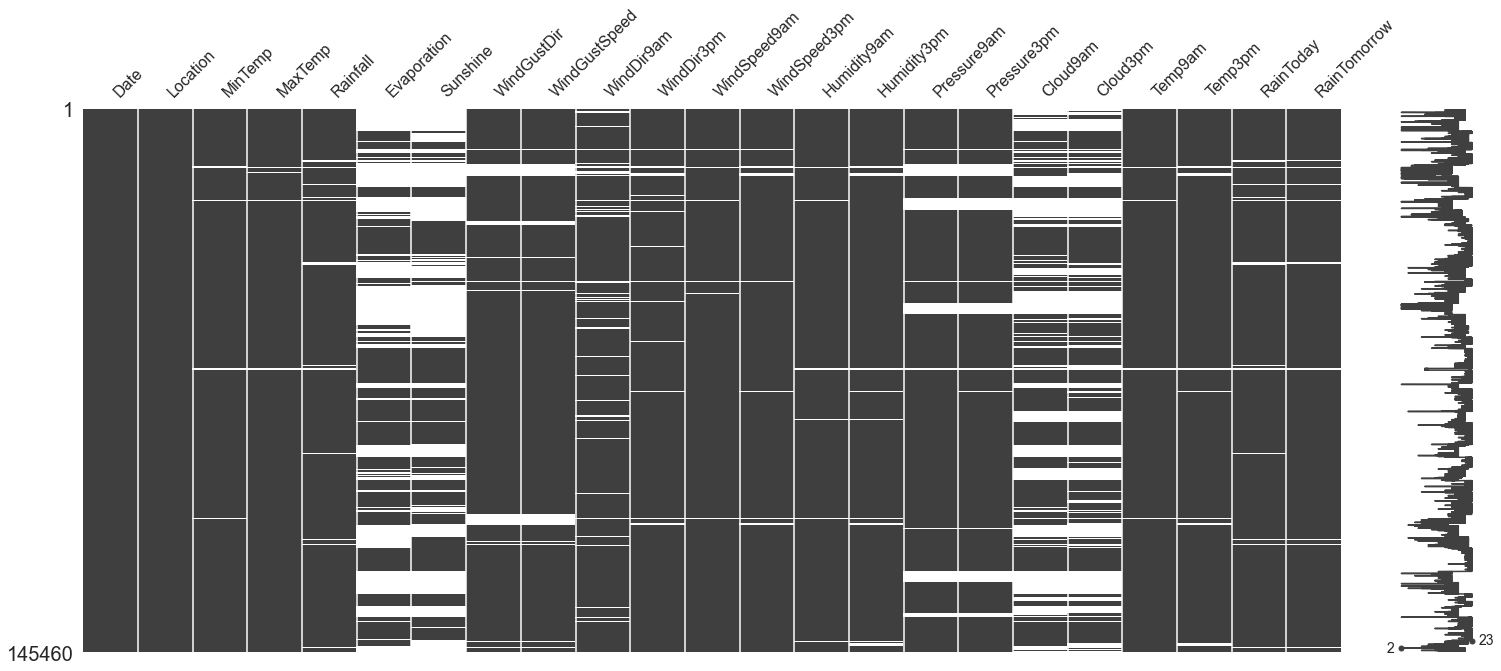

In [82]:
import missingno as msno

df.isnull().sum().sort_values(ascending=False)
msno.matrix(df)

In [83]:
# Drop Null Rain Tomorrow
df = df[df['RainTomorrow'].notna()]

# Drop the rows of the columns that has more than 25% of null value
# Because imputation will make the prediction less effective

drop_col = [col for col in df.columns if df[col].isnull().sum() > 0.25*df.shape[0]]
df = df.dropna(subset = drop_col, how='any')
        
df.isnull().sum().sort_values(ascending=False)


WindGustDir      3905
WindGustSpeed    3888
WindDir9am       1850
WindDir3pm        329
Humidity9am       148
WindSpeed9am      111
Humidity3pm        95
Pressure9am        91
WindSpeed3pm       88
Pressure3pm        76
Temp9am            72
RainToday          63
Rainfall           63
MinTemp            48
Temp3pm            30
MaxTemp            25
Cloud3pm            0
Date                0
Cloud9am            0
Location            0
Sunshine            0
Evaporation         0
RainTomorrow        0
dtype: int64

In [84]:
# Imputation with mean or median
df_numeric = df.select_dtypes(include=np.number)
df_category = df.drop(df_numeric.columns, axis=1)

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_numeric)
imputed_df_numeric = imp_mean.transform(df_numeric)

imp_most = SimpleImputer(strategy='most_frequent')
imp_most.fit(df_category)
imputed_df_category = imp_most.transform(df_category)
 
df_category = pd.DataFrame(imputed_df_category, columns=df_category.columns)
df_numeric = pd.DataFrame(imputed_df_numeric, columns=df_numeric.columns)

df_new = pd.concat([df_category, df_numeric], axis=1)


In [85]:
df_new

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2009-01-01,Cobar,SSW,ENE,SW,No,No,17.9,35.2,0.0,...,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4
1,2009-01-02,Cobar,S,SSE,SSE,No,No,18.4,28.9,0.0,...,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0
2,2009-01-04,Cobar,NNE,NNE,NNW,No,No,19.4,37.6,0.0,...,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9
3,2009-01-05,Cobar,WNW,WNW,WSW,No,No,21.9,38.4,0.0,...,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6
4,2009-01-06,Cobar,WNW,NW,WNW,No,No,24.2,41.0,0.0,...,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62352,2017-06-20,Darwin,ENE,SE,NE,No,No,19.3,33.4,0.0,...,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3
62353,2017-06-21,Darwin,E,SE,SE,No,No,21.2,32.6,0.0,...,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0
62354,2017-06-22,Darwin,E,E,W,No,No,20.7,32.8,0.0,...,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1
62355,2017-06-23,Darwin,ESE,SE,NNW,No,No,19.5,31.8,0.0,...,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2


In [86]:
df_new.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,62357.000000,62357.000000,62357.000000,62357.000000,62357.000000,62357.000000,62357.000000,62357.000000,62357.000000,62357.000000,62357.000000,62357.000000,62357.000000,62357.000000,62357.000000,62357.000000
mean,13.321665,23.942112,2.141139,5.377108,7.647736,40.546238,15.108650,19.540156,66.557540,50.463188,1017.385411,1014.958296,4.279936,4.344981,17.993512,22.437732
std,6.372471,6.890504,6.945501,3.642299,3.764078,12.971659,8.629075,8.626321,18.419452,20.202718,6.957491,6.921717,2.802526,2.651034,6.509947,6.752019
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.900000,3.700000
25%,8.500000,18.500000,0.000000,2.800000,4.900000,31.000000,9.000000,13.000000,56.000000,36.000000,1012.800000,1010.200000,1.000000,2.000000,13.000000,17.200000
50%,13.100000,23.500000,0.000000,4.800000,8.500000,39.000000,15.000000,19.000000,68.000000,51.000000,1017.300000,1014.900000,5.000000,5.000000,17.600000,22.000000
75%,18.100000,29.300000,0.800000,7.400000,10.700000,48.000000,20.000000,24.000000,80.000000,64.000000,1022.000000,1019.600000,7.000000,7.000000,22.900000,27.500000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.900000,1038.900000,9.000000,9.000000,39.400000,46.100000


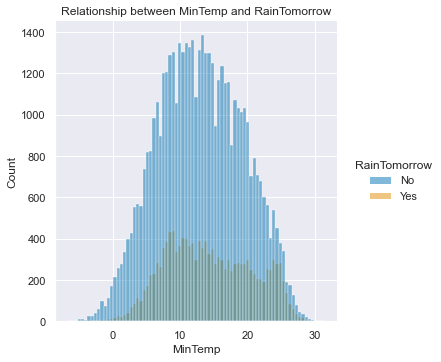

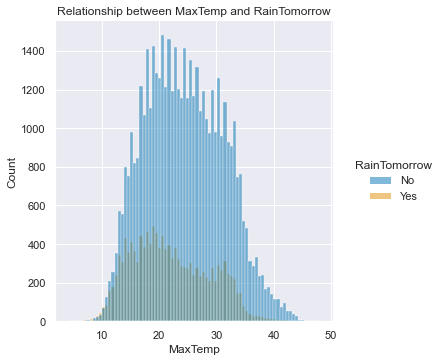

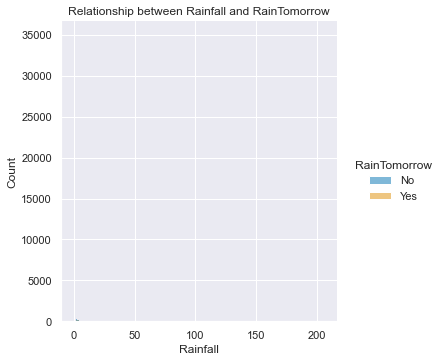

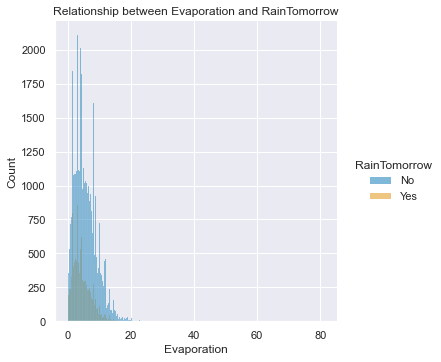

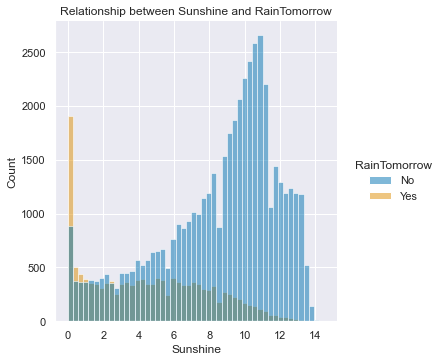

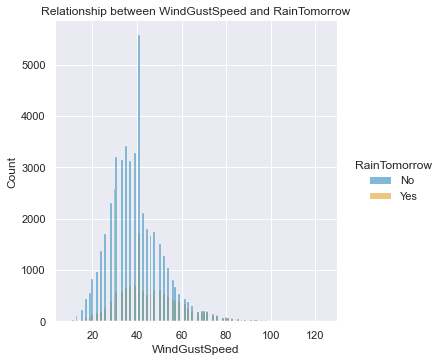

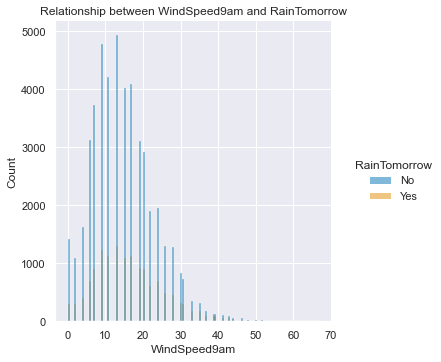

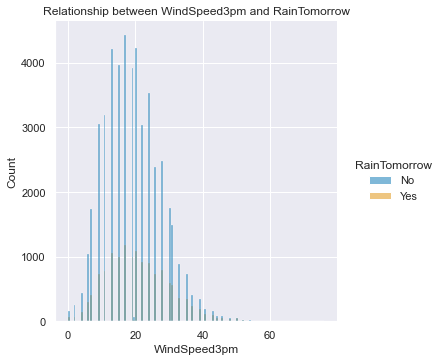

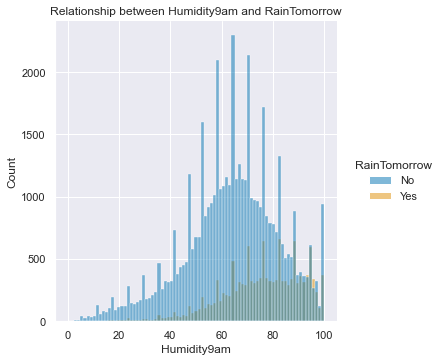

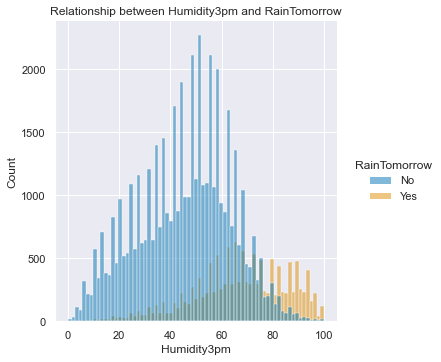

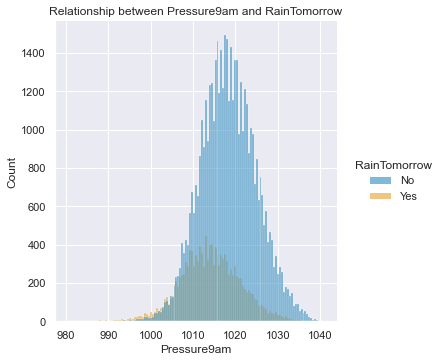

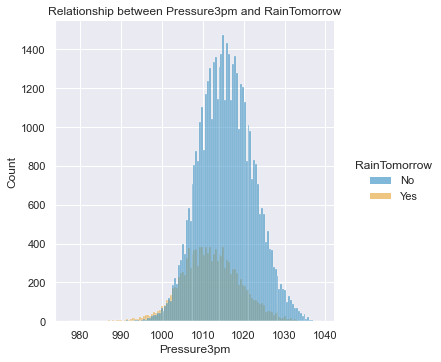

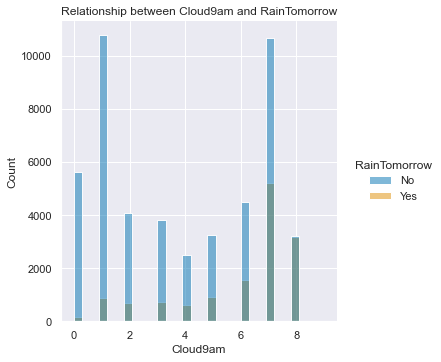

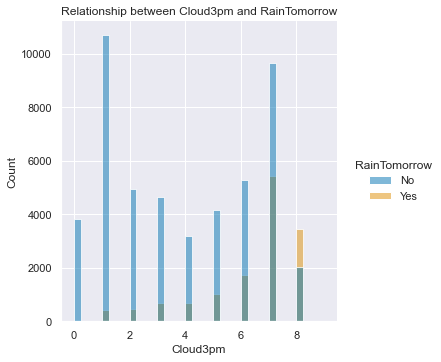

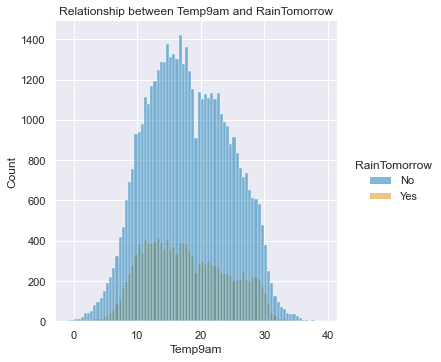

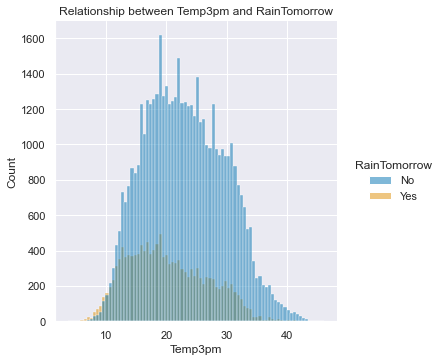

In [87]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('colorblind')
sns.set_context('notebook')

for col in df_numeric.columns:
    sns.displot(x=col, hue='RainTomorrow', data=df_new)
    plt.title(f"Relationship between {col} and RainTomorrow")

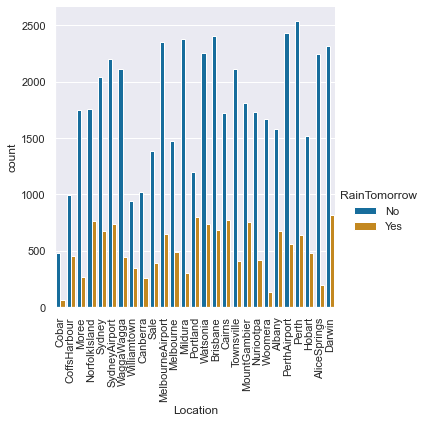

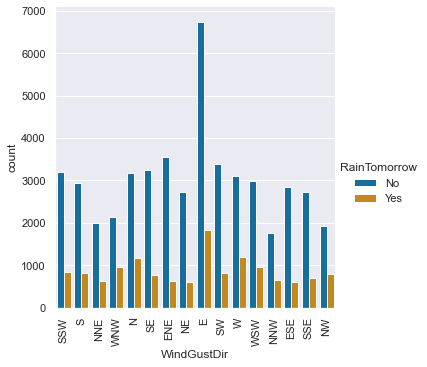

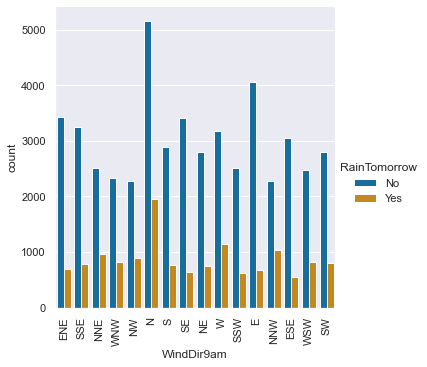

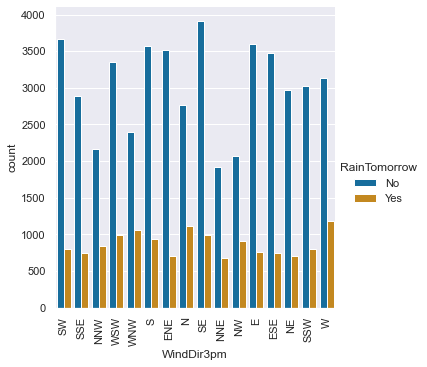

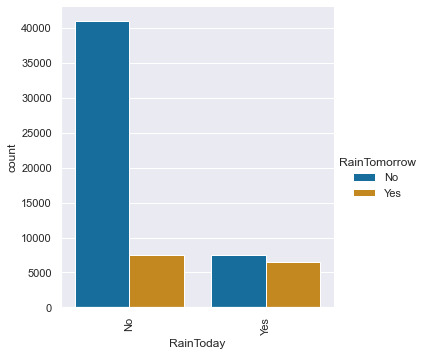

In [88]:
for col in df_category.drop(['RainTomorrow', 'Date'], axis=1).columns:
    sns.catplot(x=col, data=df_new, hue='RainTomorrow', kind='count')
    plt.xticks(rotation=90)

In [89]:
## Encoding
df_processed = df_new[['RainTomorrow']].copy()
df_processed['RainTomorrow'].replace({'Yes': 1, 'No': 0}, inplace=True)

for col in df_category.drop(['Date', 'RainTomorrow'], axis=1).columns:
    temp_cat = pd.get_dummies(df_new[col], prefix=col, drop_first=True)
    df_processed = pd.concat([df_processed, temp_cat], axis=1)

In [90]:
## Scaling
from sklearn.preprocessing import StandardScaler
    
for num in df_numeric.columns:
    scaler = StandardScaler()
    scaler.fit(df_new[[num]])
    temp = scaler.transform(df_new[[num]])
    df_processed[num+'_scaled'] = temp

In [91]:
df_processed['month'] = pd.DatetimeIndex(df_new['Date']).month

In [92]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

y = df_processed['RainTomorrow']
X = df_processed.drop(['RainTomorrow'], axis=1)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
baseline = max(y_test.mean(), 1 - y_test.mean())
print("Baseline model: ", baseline)

Baseline model:  0.7771007055805004


In [94]:
X.columns

Index(['Location_AliceSprings', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Darwin', 'Location_Hobart', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_NorfolkIsland', 'Location_Nuriootpa',
       'Location_Perth', 'Location_PerthAirport', 'Location_Portland',
       'Location_Sale', 'Location_Sydney', 'Location_SydneyAirport',
       'Location_Townsville', 'Location_WaggaWagga', 'Location_Watsonia',
       'Location_Williamtown', 'Location_Woomera', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9

In [95]:
lm = LogisticRegression(max_iter = 300)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(lm, X_train, y_train, cv=cv, scoring='accuracy')
print(scores)
accuracy_mean = (scores).mean()
print('Accuracy cross validation: ', accuracy_mean)

[0.85266112 0.85386389 0.85646988 0.85546758 0.84855167]
Accuracy cross validation:  0.8534028265009523


In [96]:
lm.fit(X_train, y_train)
prediction = lm.predict(X_test)

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score, confusion_matrix

print('Accuracy: {}'.format(accuracy_score(y_test, prediction)))
print('F-1 Score: {}'.format(f1_score(y_test, prediction)))
print('Confusion Matrix')
print(confusion_matrix(y_test,prediction))

Accuracy: 0.8521488133418859
F-1 Score: 0.6221311475409835
Confusion Matrix
[[9110  582]
 [1262 1518]]


In [98]:
n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=5)]
max_features = [1.0, 'sqrt']
max_depth = [int(x) for x in np.linspace(2, 10, num=5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
grid_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [99]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier

rfc = RandomForestClassifier()
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = grid_search, n_iter = 5, cv = 5, verbose = 2, random_state = 42, n_jobs = -1)

rfc_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10, None],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 32, 55, 77, 100]},
                   random_state=42, verbose=2)

In [100]:
rfc_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [101]:
rfc_best = RandomForestClassifier(**rfc_random.best_params_)

In [102]:
rfc_best.fit(X_train,y_train)
prediction = rfc_best.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_test, prediction)))
print('F-1 Score: {}'.format(f1_score(y_test, prediction)))
print('Confusion Matrix')
print(confusion_matrix(y_test,prediction))

Accuracy: 0.8636144964720975
F-1 Score: 0.6380080868269845
Confusion Matrix
[[9272  420]
 [1281 1499]]


In [103]:
## Dimensionality Reduction/Feature Selection
from sklearn.feature_selection import SelectFromModel

feat_imp = pd.DataFrame(rfc_best.feature_importances_, columns=['importances'])
feat_imp[['importances']].sort_values(by='importances', ascending=False)

,importances
81,0.142658
76,0.101560
83,0.060942
85,0.057439
82,0.051601
...,...
11,0.001214
21,0.001173
0,0.001087
25,0.000927


In [104]:
selector = SelectFromModel(rfc_best, threshold='mean')
selector.fit(X_train, y_train)
## print(selector.estimator_.coef_)
print(selector.threshold_)
print(selector.get_support())
X_train_imp = selector.transform(X_train)
X_test_imp = selector.transform(X_test)

0.011235955056179775
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


In [105]:
rfc_best_imp = RandomForestClassifier(**rfc_random.best_params_)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(rfc_best_imp, X_train_imp, y_train, cv=cv, scoring='accuracy')
accuracy_mean = (scores).mean()
print('Accuracy cross validation: ',accuracy_mean)

Accuracy cross validation:  0.8582138919514885


In [106]:
rfc_best_imp.fit(X_train_imp,y_train)
prediction = rfc_best_imp.predict(X_test_imp)
print('Accuracy: {}'.format(accuracy_score(y_test, prediction)))
print('F-1 Score: {}'.format(f1_score(y_test, prediction)))
print('Confusion Matrix')
print(confusion_matrix(y_test,prediction))

Accuracy: 0.8624919820397691
F-1 Score: 0.6403858251205703
Confusion Matrix
[[9230  462]
 [1253 1527]]


In [112]:
## GradientBoostingClassifier
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)]
max_features = [1.0, 'sqrt']
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]
criterion = ["friedman_mse", "squared_error", "mae"]
grid_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}

In [113]:
gbc = GradientBoostingClassifier()
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = grid_search, n_iter = 5, cv = 5, verbose = 2, random_state=42, n_jobs = -1)
gbc_random.fit(X_train_imp, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mae'],
                                        'max_depth': [2, 4, 6, 8, 10, None],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   random_state=42, verbose=2)

In [114]:
gbc_random.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 6,
 'criterion': 'friedman_mse'}

In [115]:
gbc_best = GradientBoostingClassifier(**gbc_random.best_params_)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(gbc_best, X_train_imp, y_train, cv=cv, scoring='accuracy')
accuracy_mean = (scores).mean()
print('Accuracy cross validation: ',accuracy_mean)

Accuracy cross validation:  0.851197754836123


In [116]:
gbc_best.fit(X_train_imp,y_train)
prediction = gbc_best.predict(X_test_imp)
print('Accuracy: {}'.format(accuracy_score(y_test, prediction)))
print('F-1 Score: {}'.format(f1_score(y_test, prediction,average="weighted")))
print('Confusion Matrix')
print(confusion_matrix(y_test,prediction))

Accuracy: 0.8530307889672867
F-1 Score: 0.8410830442650181
Confusion Matrix
[[9258  434]
 [1399 1381]]
